In this notebook, I want to perform Churn Prediction, which aims to detect which customers are likely to leave a service. I obtained the dataset from Kaggle at the following link: https://www.kaggle.com/datasets/uom190346a/e-commerce-customer-behavior-dataset/data. First, I need to examine the structure of the dataset and identify which data points are relevant for determining churn prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E-commerce Customer Behavior.csv")

In [3]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
#Data Dimension
df.shape

(350, 11)

In [5]:
# Summary Statistics for numeric columns
num_sum = df.describe()
print(num_sum)

       Customer ID         Age  Total Spend  Items Purchased  Average Rating  \
count   350.000000  350.000000   350.000000       350.000000      350.000000   
mean    275.500000   33.597143   845.381714        12.600000        4.019143   
std     101.180532    4.870882   362.058695         4.155984        0.580539   
min     101.000000   26.000000   410.800000         7.000000        3.000000   
25%     188.250000   30.000000   502.000000         9.000000        3.500000   
50%     275.500000   32.500000   775.200000        12.000000        4.100000   
75%     362.750000   37.000000  1160.600000        15.000000        4.500000   
max     450.000000   43.000000  1520.100000        21.000000        4.900000   

       Days Since Last Purchase  
count                350.000000  
mean                  26.588571  
std                   13.440813  
min                    9.000000  
25%                   15.000000  
50%                   23.000000  
75%                   38.000000  
max    

In [6]:
# Summary for non-numeric columns
cat_sum = df.describe(include='object')
print(cat_sum)

        Gender      City Membership Type Satisfaction Level
count      350       350             350                348
unique       2         6               3                  3
top     Female  New York            Gold          Satisfied
freq       175        59             117                125


In [7]:
#Check missing data
df.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [8]:
df[df["Satisfaction Level"].isnull()]

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


Since there are only 2 NaN data so I can drop these rows

In [9]:
df_drop = df.dropna()

In [10]:
df_drop.shape #Two data have been dropped

(348, 11)

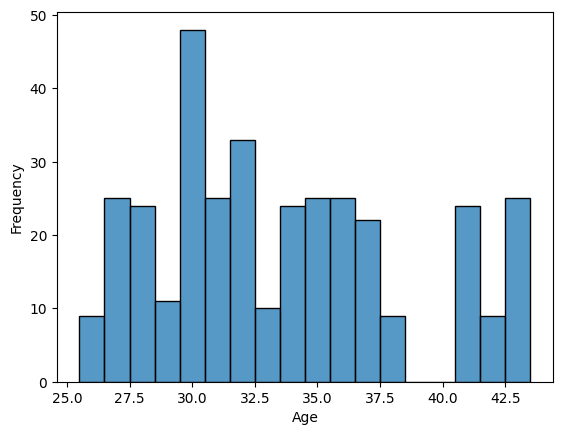

In [11]:
#Plotting the "Age" data distribution

sns.histplot(df_drop["Age"], bins=len(df_drop["Age"].unique()), discrete=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('')
plt.show()

In [12]:
min_age = df_drop["Age"].min()
max_age = df_drop["Age"].max()
count_age = df_drop["Age"].value_counts()
max_count_age = count_age.idxmax()
print(f"Minimum Customer Age: {min_age} years")
print(f"Maximum Customer Age: {max_age} years")
print(f"Age with High Frequency: {max_count_age} years")

Minimum Customer Age: 26 years
Maximum Customer Age: 43 years
Age with High Frequency: 30 years


In [13]:
# Gender distribution
gender_counts = df_drop["Gender"].value_counts()
print(gender_counts)

Gender
Male      175
Female    173
Name: count, dtype: int64


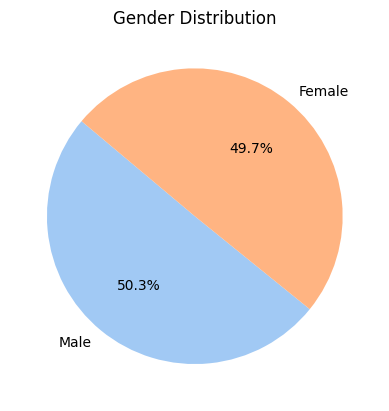

In [14]:
# Gender distribution plotting
gender_counts.columns = ['Gender', 'Counts']
colors = sns.color_palette('pastel')[0:len(gender_counts)]
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

By using this dataset, I want to make Churn Prediction which aims to detect which customers are likely to leave a service. This is important because it allows us to identify the signs of potential customer churn before it happens, so we can improve the customer experience and avoid losing existing customers.

First, I need to select the data to be used as input for making predictions. This selection is based on the correlation of each data variabel with the data variable "Days since last purchase".

In [15]:
# Dataset with only Age, Total Spend, Items Purchased, Average Rating, and Days Since Last Purchase
df_set = df_drop[["Age", "Total Spend", "Items Purchased", "Average Rating", "Days Since Last Purchase"]]
df_set.head()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
0,29,1120.20,14,4.6,25
1,34,780.50,11,4.1,18
2,43,510.75,9,3.4,42
3,30,1480.30,19,4.7,12
4,27,720.40,13,4.0,55


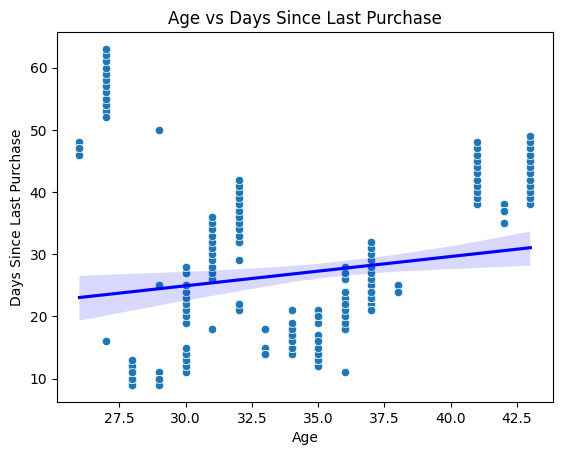

In [16]:
# Plot of Age vs Days Since Last Purchase 
sns.scatterplot(x=df_set["Age"], y=df_set["Days Since Last Purchase"], data=df_set)
sns.regplot(x=df_set["Age"], y=df_set["Days Since Last Purchase"], data=df_set, scatter=False, order=1, color='blue')
plt.xlabel('Age')
plt.ylabel('Days Since Last Purchase')
plt.title('Age vs Days Since Last Purchase')
plt.show()

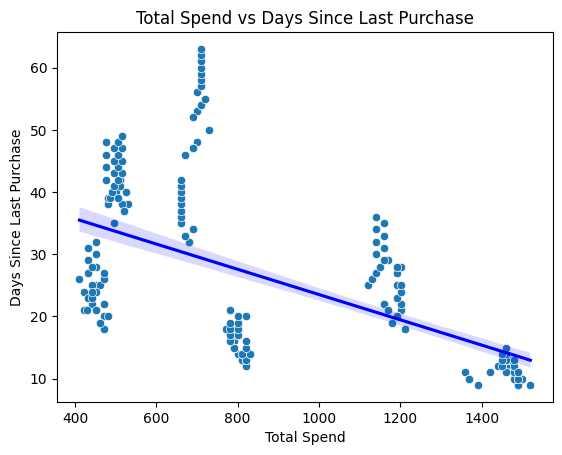

In [17]:
# Plot of Total Spend vs Days Since Last Purchase 
sns.scatterplot(x=df_set["Total Spend"], y=df_set["Days Since Last Purchase"], data=df_set)
sns.regplot(x=df_set["Total Spend"], y=df_set["Days Since Last Purchase"], data=df_set, scatter=False, order=1, color='blue')
plt.xlabel('Total Spend')
plt.ylabel('Days Since Last Purchase')
plt.title('Total Spend vs Days Since Last Purchase')
plt.show()

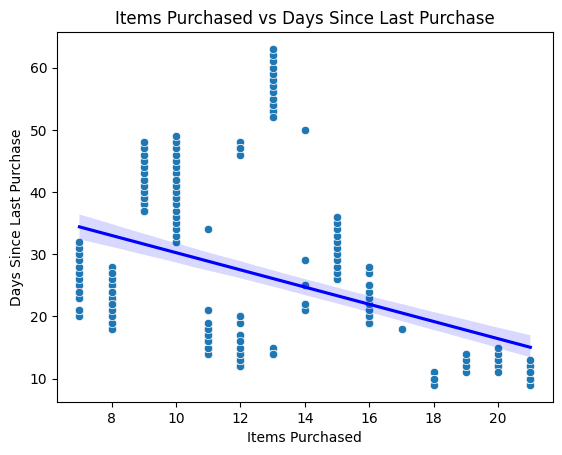

In [18]:
# Plot of Items Purchased vs Days Since Last Purchase
sns.scatterplot(x=df_set["Items Purchased"], y=df_set["Days Since Last Purchase"], data=df_set)
sns.regplot(x=df_set["Items Purchased"], y=df_set["Days Since Last Purchase"], data=df_set, scatter=False, order=1, color='blue')
plt.xlabel('Items Purchased')
plt.ylabel('Days Since Last Purchase')
plt.title('Items Purchased vs Days Since Last Purchase')
plt.show()

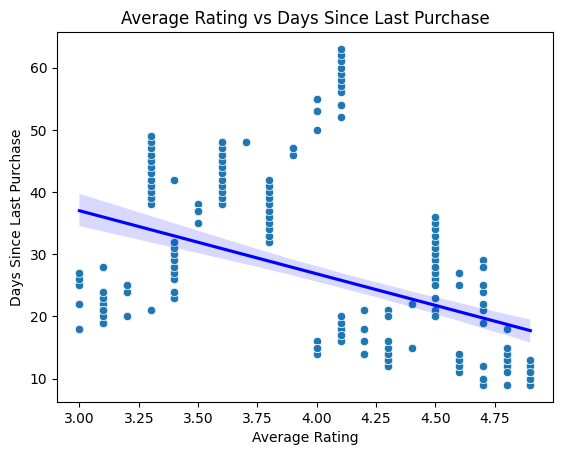

In [19]:
# Plot of Average Rating vs Days Since Last Purchase
sns.scatterplot(x=df_set["Average Rating"], y=df_set["Days Since Last Purchase"], data=df_set)
sns.regplot(x=df_set["Average Rating"], y=df_set["Days Since Last Purchase"], data=df_set, scatter=False, order=1, color='blue')
plt.xlabel('Average Rating')
plt.ylabel('Days Since Last Purchase')
plt.title('Average Rating vs Days Since Last Purchase')
plt.show()

Based on the plotted graph above, it can be seen that there is no consistent pattern or strong association between all these three data points (Age, Total Spend, Items Purchased, Average Rating) and the Days Since Last Purchase. Therefore, to understand the correlation more clearly, I used a correlation matrix. Here are the results of the correlation matrix.

In [20]:
# Correlation matrix
corr_matrix = df_set.corr()

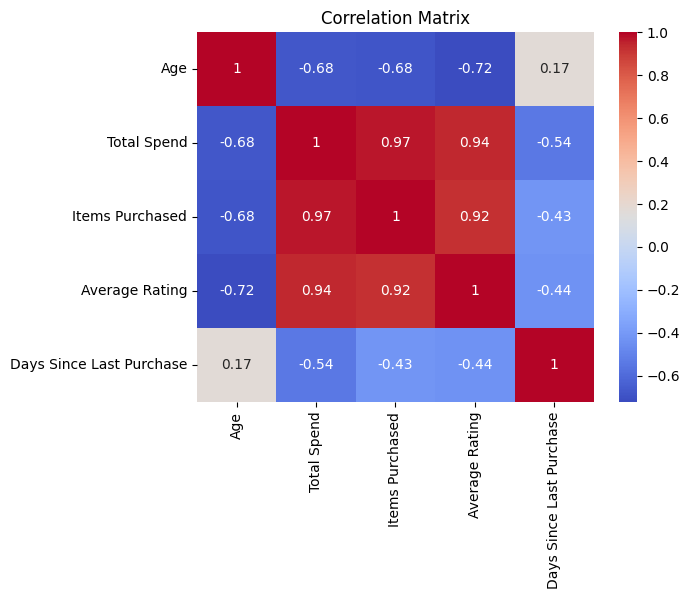

In [21]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the heatmap above, it can be seen that the "Age" data does not have relation to the "Days Since Last Purchase" data. The data "Total Spend," "Items Purchased," and "Average Rating" have a significant impact on "Days Since Last Purchase" with negative correlation. This shows that more active and more satisfied customers tend to make more frequent purchases. Therefore, these three data points will be used as input to predict customer "Churn". 

I will use a Support Vector Machine (SVM) to predict whether a customer is churned or not due to the low correlation values. It can also be seen from the previous scatter plot data that linear regression cannot adequately describe the correlation with the "Days Since Last Purchase" data.

In [22]:
# Let's set the threshold for deciding whether a customer is churned or not.
threshold = 21 #Lets assume 3 weeks

In [23]:
# Adding new column for Churn
df_set['Churn'] = df_set['Days Since Last Purchase'].apply(lambda x: 1 if x > threshold else 0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26812\574736670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_set['Churn'] = df_set['Days Since Last Purchase'].apply(lambda x: 1 if x > threshold else 0)


In [24]:
df_set.head()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Churn
0,29,1120.20,14,4.6,25,1
1,34,780.50,11,4.1,18,0
2,43,510.75,9,3.4,42,1
3,30,1480.30,19,4.7,12,0
4,27,720.40,13,4.0,55,1


In [25]:
# Set Total Spend, Item Purchased, and Average Rating as an input for the model
X = df_set[["Total Spend", "Items Purchased", "Average Rating"]]
y = df_set["Churn"]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
# Take 70% data for training and 30% data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [30]:
y_pred = model.predict(X_test)

In [31]:
# Evaluate model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        51
           1       0.88      0.91      0.89        54

    accuracy                           0.89       105
   macro avg       0.89      0.89      0.89       105
weighted avg       0.89      0.89      0.89       105



Based on the model evaluation results above using the scikit-learn library, it is shown that the model performs well, achieving a precision of 0.90 for predicting non-churning customers (class 0) and 0.88 for predicting churning customers (class 1). The recall values are 0.86 for class 0 and 0.91 for class 1, indicating that the model accurately identifies 86% of actual non-churning customers and 91% of actual churning customers. The overall accuracy of the model is 89%, demonstrating its effectiveness in predicting customer churn.

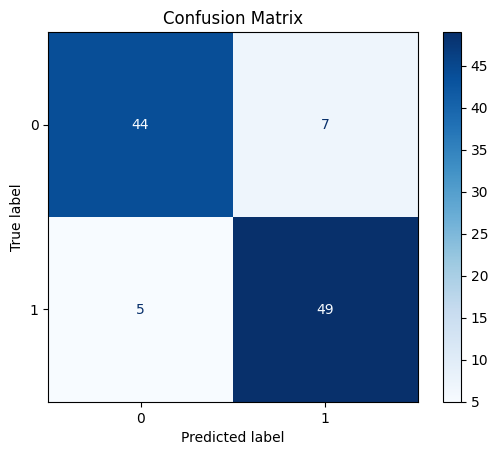

In [32]:
# Plot confusion matrix
confus_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confus_mat, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

The confusion matrix indicates that the model successfully identified 49 churn instances (true positives) and 44 non-churn instances (true negatives).However, it also generated 7 false positive predictions, mistakenly categorizing non-churning customers as churned, along with 5 false negatives, where actual churn cases were not recognized.The relatively small counts of false positives and false negatives highlight the model's capability to differentiate effectively between churned and non-churning customers.Overall, these metrics suggest that the model is proficient in predicting customer churn, offering valuable insights for enhancing customer retention strategies.